In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('KNN_3_1_regression','rb') as file:
    mp = pickle.load(file)

In [3]:
test1=pd.read_excel('test_data_c1=c2|c3.xlsx')

In [4]:
test1

,c1,c2,c3
0,0.825931,0.825931,1.024480
1,0.834376,0.834376,0.964320
2,0.916691,0.916691,1.024306
3,0.866426,0.866426,0.864534
4,0.778904,0.778904,0.822459
...,...,...,...
995,0.995163,0.995163,0.995847
996,0.889150,0.889150,0.799367
997,0.794226,0.794226,0.875584
998,0.849862,0.849862,1.014004


In [5]:
p_test1=mp.predict(test1.values)

In [6]:
# Looks like 5 bins make sense. We need a function to map a float to an integer (the class)
def map_float_to_class(number: float):
    """
    Hard code the bin thresholds. 
    Aggregate everything larger than 196000
    """
    if 0.00<= number<0.25:
        return 0
    elif  0.25<=number<0.50:
        return 1
    elif  0.50<=number<0.75:
        return 2
    elif number>=0.75:
        return 3
    else:
        raise ValueError(f'Invalid number: {number}')
        
# Hard coded labels array based on the thresholds defined above for future plotting purposes
labels = ('0.00 - 0.25', '0.25- 0.50','0.50-0.75','0.75-1.0')

In [7]:
ph_labels_t1 = np.array([map_float_to_class(y) for y in p_test1])

In [8]:
c1t1=np.count_nonzero(ph_labels_t1==0)
c2t1=np.count_nonzero(ph_labels_t1==1)
c3t1=np.count_nonzero(ph_labels_t1==2)
c4t1=np.count_nonzero(ph_labels_t1==3)

In [9]:
x1t1='$\mathcal{P}(p_h)$=1\nclass 0'
x2t1='$\mathcal{P}(p_h)$=1\nclass 1'
x3t1='$\mathcal{P}(p_h)$=1\nclass 2'
x4t1='$\mathcal{P}(p_h)$=1\nclass 3'

In [10]:
x_lab_t1=x1t1,x2t1,x3t1,x4t1
y_lab_t1=c1t1,c2t1,c3t1,c4t1

(0.01, 700.0)

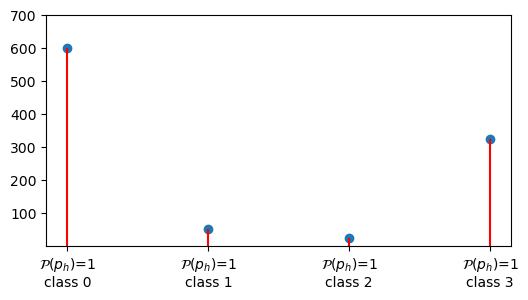

In [11]:
plt.figure(figsize=(6,3))
plt.scatter(x_lab_t1,y_lab_t1)
plt.vlines(x = x_lab_t1[0],ymin=-1, ymax = y_lab_t1[0], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[1],ymin=-1, ymax = y_lab_t1[1], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[2],ymin=-1, ymax = y_lab_t1[2], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[3],ymin=-1, ymax = y_lab_t1[3], color = 'r',
            label = 'axvline - % of full height')
plt.ylim(top=700,bottom=0.01)

In [12]:
t1_res = pd.DataFrame()

In [13]:
t1_res['act_vals']=p_test1
t1_res['labs'] = ph_labels_t1

In [14]:
t1_ph_dist_c0 = t1_res[t1_res.labs.values==0].act_vals.values
t1_ph_dist_c1 = t1_res[t1_res.labs.values==1].act_vals.values
t1_ph_dist_c2 = t1_res[t1_res.labs.values==2].act_vals.values
t1_ph_dist_c3 = t1_res[t1_res.labs.values==3].act_vals.values

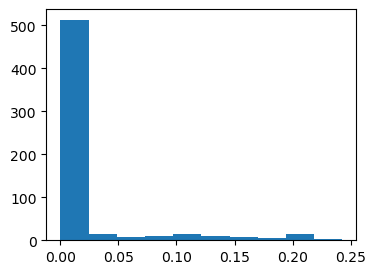

In [15]:
plt.figure(figsize=(4,3))
plt.hist(t1_ph_dist_c0)
plt.show()

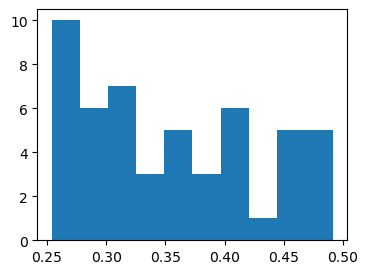

In [16]:
plt.figure(figsize=(4,3))
plt.hist(t1_ph_dist_c1)
plt.show()

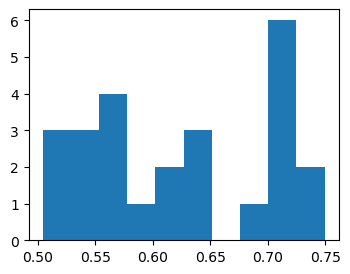

In [17]:
plt.figure(figsize=(4,3))
plt.hist(t1_ph_dist_c2)
plt.show()

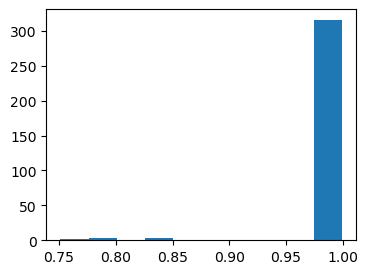

In [18]:
plt.figure(figsize=(4,3))
plt.hist(t1_ph_dist_c3)
plt.show()

In [19]:
test2=pd.read_excel('test_data_c1>c2|c3.xlsx')

In [20]:
p_test2=mp.predict(test2.values)

In [21]:
ph_labels_t2 = np.array([map_float_to_class(y) for y in p_test2])

In [22]:
c1t2=np.count_nonzero(ph_labels_t2==0)
c2t2=np.count_nonzero(ph_labels_t2==1)
c3t2=np.count_nonzero(ph_labels_t2==2)
c4t2=np.count_nonzero(ph_labels_t2==3)

In [23]:
x_lab_t1=x1t1,x2t1,x3t1,x4t1
y_lab_t2=c1t2,c2t2,c3t2,c4t2

(0.01, 700.0)

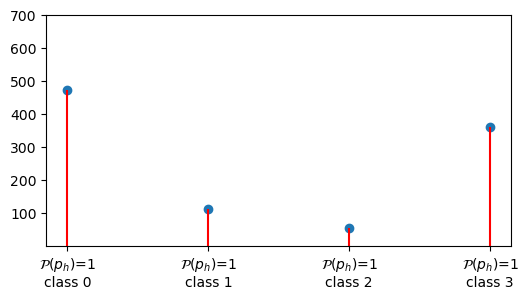

In [24]:
plt.figure(figsize=(6,3))
plt.scatter(x_lab_t1,y_lab_t2)
plt.vlines(x = x_lab_t1[0],ymin=-1, ymax = y_lab_t2[0], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[1],ymin=-1, ymax = y_lab_t2[1], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[2],ymin=-1, ymax = y_lab_t2[2], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[3],ymin=-1, ymax = y_lab_t2[3], color = 'r',
            label = 'axvline - % of full height')
plt.ylim(top=700,bottom=0.01)

In [29]:
t2_res = pd.DataFrame()

In [30]:
t2_res['act_vals']=p_test2
t2_res['labs'] = ph_labels_t2

In [31]:
t2_ph_dist_c0 = t2_res[t2_res.labs.values==0].act_vals.values
t2_ph_dist_c1 = t2_res[t2_res.labs.values==1].act_vals.values
t2_ph_dist_c2 = t2_res[t2_res.labs.values==2].act_vals.values
t2_ph_dist_c3 = t2_res[t2_res.labs.values==3].act_vals.values

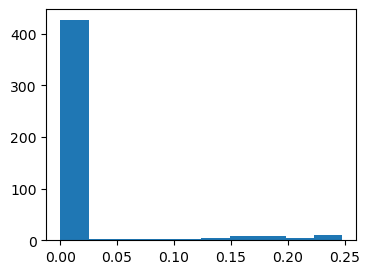

In [32]:
plt.figure(figsize=(4,3))
plt.hist(t2_ph_dist_c0)
plt.show()

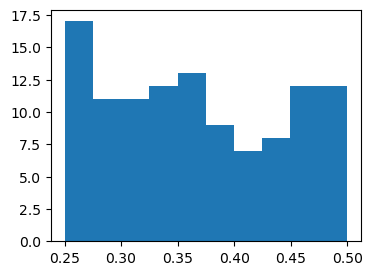

In [33]:
plt.figure(figsize=(4,3))
plt.hist(t2_ph_dist_c1)
plt.show()

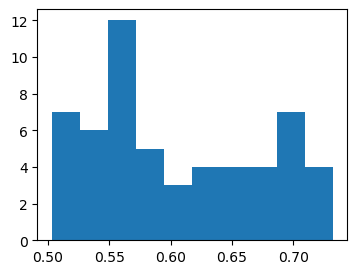

In [34]:
plt.figure(figsize=(4,3))
plt.hist(t2_ph_dist_c2)
plt.show()

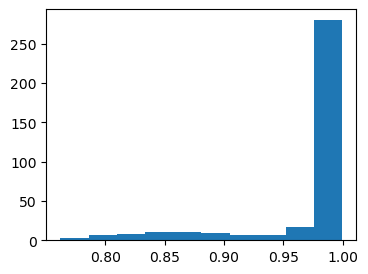

In [35]:
plt.figure(figsize=(4,3))
plt.hist(t2_ph_dist_c3)
plt.show()

(0.01, 900.0)

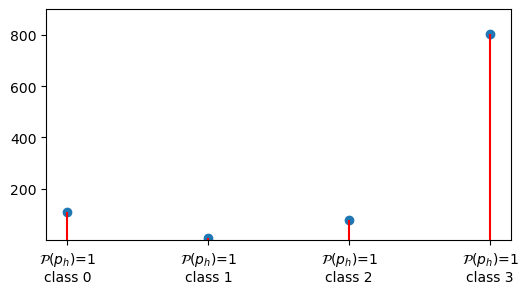

In [36]:
#reading the data file
test3=pd.read_excel('test_data_c1<c2|c3.xlsx')
##################################
#predicting using the test data
p_test3=mp.predict(test3.values)
###############################
ph_labels_t3 = np.array([map_float_to_class(y) for y in p_test3])
#categorising classes into columns
c1t3=np.count_nonzero(ph_labels_t3==0)
c2t3=np.count_nonzero(ph_labels_t3==1)
c3t3=np.count_nonzero(ph_labels_t3==2)
c4t3=np.count_nonzero(ph_labels_t3==3)
###############################
y_lab_t3=c1t3,c2t3,c3t3,c4t3

plt.figure(figsize=(6,3))
plt.scatter(x_lab_t1,y_lab_t3)
plt.vlines(x = x_lab_t1[0],ymin=-1, ymax = y_lab_t3[0], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[1],ymin=-1, ymax = y_lab_t3[1], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[2],ymin=-1, ymax = y_lab_t3[2], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[3],ymin=-1, ymax = y_lab_t3[3], color = 'r',
            label = 'axvline - % of full height')
plt.ylim(top=900,bottom=0.01)


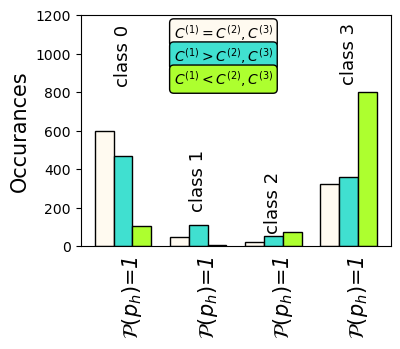

In [37]:
plt.figure(figsize=(4,3))
x=np.array([0,2,4,6])*2
plt.bar(x,y_lab_t1,color='floralwhite',width=1.0,edgecolor='black')
plt.bar(x+1,y_lab_t2,color='turquoise',width=1.0,edgecolor='black')
plt.bar(x+2,y_lab_t3,color='greenyellow',width=1.0,edgecolor='black')

plt.annotate('class 0', xy=(1, y_lab_t1[0]),xytext=(1, y_lab_t1[0]+250), rotation=90,ha='center',fontsize=13)
plt.annotate('class 1', xy=(5, y_lab_t1[1]), xytext=(5, y_lab_t1[1]+150),rotation=90,ha='center',fontsize=13)
plt.annotate('class 2', xy=(9, y_lab_t1[2]), xytext=(9, y_lab_t1[2]+60),rotation=90,ha='center',fontsize=13)
plt.annotate('class 3', xy=(13, y_lab_t2[3]),xytext=(13, y_lab_t2[3]+500), rotation=90,ha='center',fontsize=13)

plt.xticks(x+1.5,(('$\\mathcal{P}(p_h)$=1',
 '$\\mathcal{P}(p_h)$=1',
 '$\\mathcal{P}(p_h)$=1',
 '$\\mathcal{P}(p_h)$=1')),fontstyle='oblique',rotation=90,fontsize=15)
plt.ylabel('Occurances',fontsize=15)
plt.yticks(fontsize=10)
plt.ylim(top=1200)
plt.annotate('$C^{{(1)}}=C^{{(2)}},C^{{(3)}}$', xy=(0.3,0.9 ), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="floralwhite", ec="black"))
plt.annotate('$C^{{(1)}}>C^{{(2)}},C^{{(3)}}$', xy=(0.3,0.8), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="turquoise", ec="black"))
plt.annotate('$C^{{(1)}}<C^{{(2)}},C^{{(3)}}$', xy=(0.3,0.7 ), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc='greenyellow', ec="black"))
plt.grid(visible=False, axis="x")  # remove only x-axis grid lines
plt.tick_params(axis='x', which='both', bottom=False, top=False)
# plt.savefig('f2.jpeg',dpi=300)

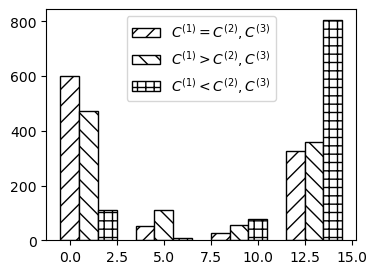

In [38]:
plt.figure(figsize=(4, 3))
x = np.array([0, 2, 4, 6]) * 2
plt.bar(x, y_lab_t1, color='white', edgecolor='black', hatch='//', width=1.0,label='$C^{{(1)}}=C^{{(2)}},C^{{(3)}}$')
plt.bar(x + 1, y_lab_t2, color='white', edgecolor='black', hatch='\\\\', width=1.0,label='$C^{{(1)}}>C^{{(2)}},C^{{(3)}}$')
plt.bar(x + 2, y_lab_t3, color='white', edgecolor='black', hatch='++', width=1.0,label='$C^{{(1)}}<C^{{(2)}},C^{{(3)}}$')

# Rest of your code...
plt.legend()
plt.show()


In [39]:
t3_res = pd.DataFrame()

In [40]:
t3_res['act_vals']=p_test3
t3_res['labs'] = ph_labels_t3

In [41]:
t3_ph_dist_c0 = t3_res[t3_res.labs.values==0].act_vals.values
t3_ph_dist_c1 = t3_res[t3_res.labs.values==1].act_vals.values
t3_ph_dist_c2 = t3_res[t3_res.labs.values==2].act_vals.values
t3_ph_dist_c3 = t3_res[t3_res.labs.values==3].act_vals.values

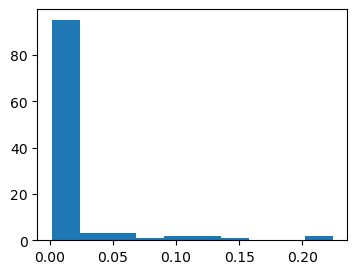

In [43]:
plt.figure(figsize=(4,3))
plt.hist(t3_ph_dist_c0)
plt.show()

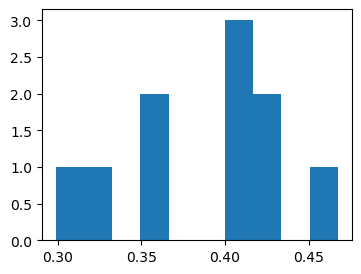

In [44]:
plt.figure(figsize=(4,3))
plt.hist(t3_ph_dist_c1)
plt.show()

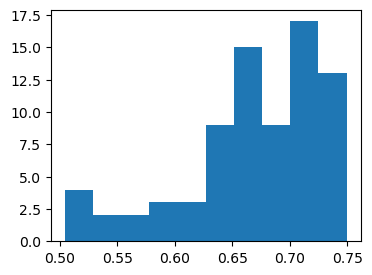

In [45]:
plt.figure(figsize=(4,3))
plt.hist(t3_ph_dist_c2)
plt.show()

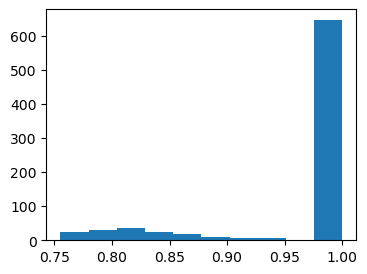

In [46]:
plt.figure(figsize=(4,3))
plt.hist(t3_ph_dist_c3)
plt.show()